In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn. linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
import warnings 
warnings.filterwarnings( 'ignore' )

In [2]:
df=pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.isna() .sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<Axes: xlabel='Age', ylabel='Sex'>

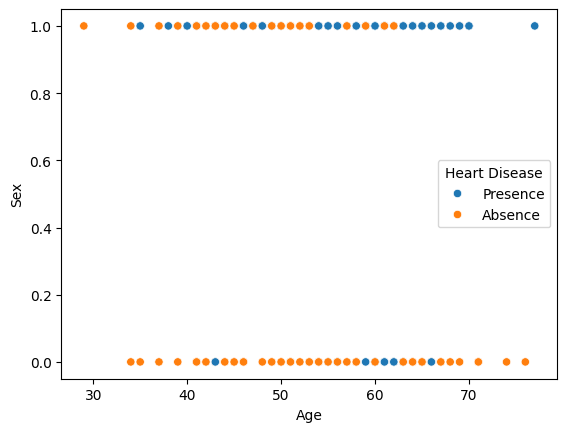

In [7]:
sns.scatterplot(x=df['Age'],y=df['Sex'],hue=df['Heart Disease'])

<Axes: xlabel='Age', ylabel='ST depression'>

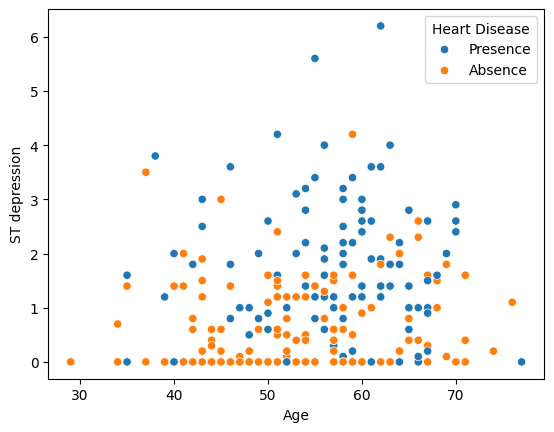

In [8]:
sns.scatterplot(x=df['Age'],y=df['ST depression'],hue=df['Heart Disease'])

<Axes: xlabel='Age', ylabel='ST depression'>

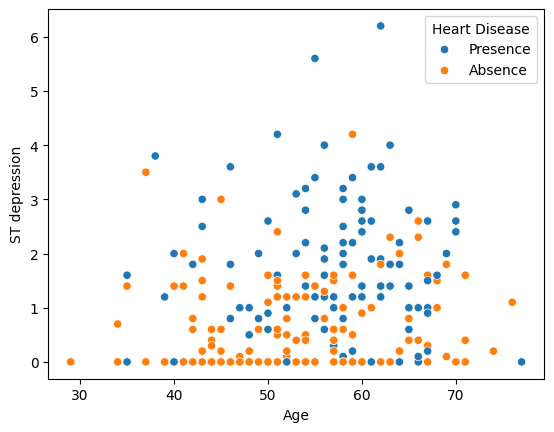

In [9]:
sns.scatterplot(x=df['Age'],y=df['ST depression'],hue=df['Heart Disease'])

In [10]:
# df['Heart Disease']=df['Heart Disease'].map({ 'Presence' : 1, 'Absence' : 0})

In [11]:
# plt.figure(figsize=(12,8)) 
# sns.heatmap(df. corr(), annot=True)

In [12]:
# sns.pairplot(df,hue='Heart Disease')

In [13]:
x=np.array(df.drop(['Heart Disease' ] ,axis=1)) 
y=np.array(df[ 'Heart Disease' ])

In [14]:
xtrain, xtest, ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [15]:
def report(actual,pred) :
    acc_score=accuracy_score(actual, pred)
    con_mat=confusion_matrix(actual, pred )
    class_rep=classification_report(actual,pred) 
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print( '\n',con_mat) 
    print( ' \n ' , class_rep)

In [16]:
#LOGISTIC REGRESSION
log=LogisticRegression() 
log.fit(xtrain,ytrain) 
train_log=log.predict (xtrain) 
test_log=log. predict (xtest ) 
report(ytrain,train_log) 
report (ytest, test_log)
test_log

Accuracy of model is 85.19 %

 [[101  12]
 [ 20  83]]
 
                precision    recall  f1-score   support

     Absence       0.83      0.89      0.86       113
    Presence       0.87      0.81      0.84       103

    accuracy                           0.85       216
   macro avg       0.85      0.85      0.85       216
weighted avg       0.85      0.85      0.85       216

Accuracy of model is 81.48 %

 [[28  9]
 [ 1 16]]
 
                precision    recall  f1-score   support

     Absence       0.97      0.76      0.85        37
    Presence       0.64      0.94      0.76        17

    accuracy                           0.81        54
   macro avg       0.80      0.85      0.81        54
weighted avg       0.86      0.81      0.82        54



array(['Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence'],
      dtype=object)

In [17]:
##K-Nearest Neighbour
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [18]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [19]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

9.746794344808963

In [20]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [21]:
y_pred = classifier.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'A

In [22]:
#Random Forest
rf=RandomForestClassifier( n_estimators=15 , max_depth=4, min_samples_split=15,random_state=786)
rf.fit(xtrain,ytrain) 
train_rf=rf.predict(xtrain)  
test_rf=rf.predict (xtest) 
report(ytrain,train_rf) 
report (ytest, test_rf)
test_rf

Accuracy of model is 87.96 %

 [[103  10]
 [ 16  87]]
 
                precision    recall  f1-score   support

     Absence       0.87      0.91      0.89       113
    Presence       0.90      0.84      0.87       103

    accuracy                           0.88       216
   macro avg       0.88      0.88      0.88       216
weighted avg       0.88      0.88      0.88       216

Accuracy of model is 85.19 %

 [[31  6]
 [ 2 15]]
 
                precision    recall  f1-score   support

     Absence       0.94      0.84      0.89        37
    Presence       0.71      0.88      0.79        17

    accuracy                           0.85        54
   macro avg       0.83      0.86      0.84        54
weighted avg       0.87      0.85      0.86        54



array(['Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence'], dtype=object)

In [23]:
input=[[48,1,4,122,222,0,2,186,0,0,1,0,3]]
prediction=log.predict(input)
print(prediction[0])

Absence


In [24]:
import pickle
pickle.dump(log,open("Heart_prediction_Log.pkl","wb"))